### Import the Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Importing the Data

In [2]:
raw_csv_data = pd.read_csv("dataset/Index2018.csv")

In [33]:
df_comp = raw_csv_data.copy()

### Examining the Data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_comp.spx.isna().sum()

0

### Plotting the Data

In [8]:
import matplotlib.pyplot as plt

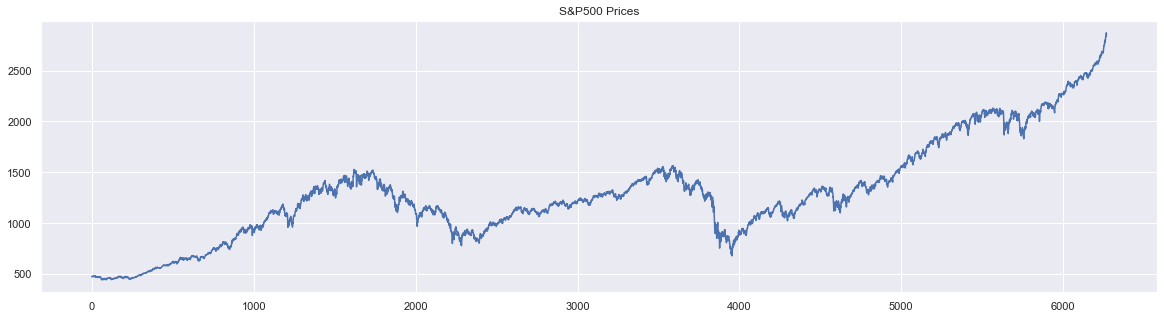

In [9]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
plt.show()

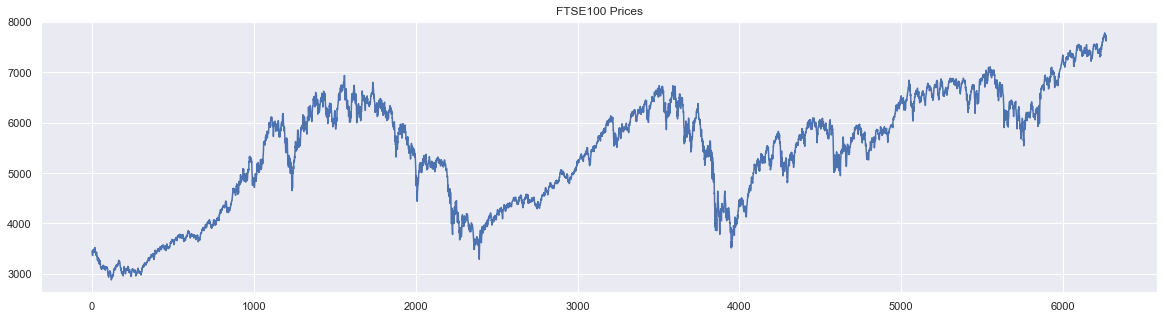

In [10]:
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.show()

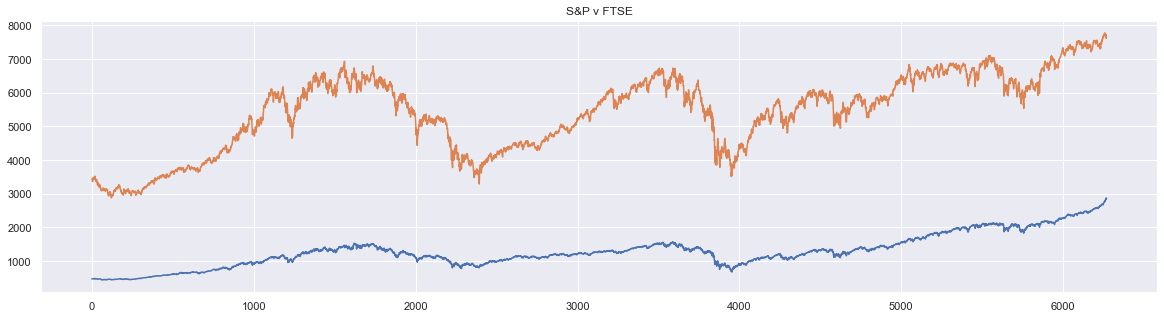

In [11]:
#plotting two figures together
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P v FTSE")
plt.show()

### The QQ Plot

* Quantile-Quantile Plot(QQ Plot)
* Used to determine whether a dataset is distributed in a certain way
* usually showcases how the data fits a Normal Distribution

In [10]:
import scipy.stats
import pylab

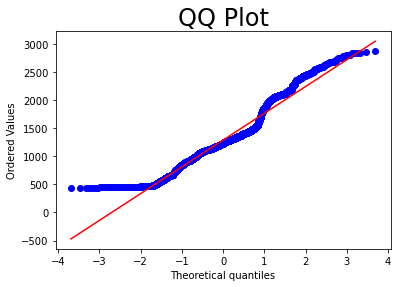

In [11]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

* QQ Plot takles all the values a variable can take and arranges them in accending order.
* y axis shows the price
* x axis shows Theoretical quantile. It explains how many **standard deviations** away from the **mean** these values are
* The **red diagonal line** shows what the data points should follow,if they are Normally distributed.

### Lenght of the Time Period

In [12]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


**The describe method doesn't include date column. Because the column holds string values**

In [13]:
df_comp.date.describe()

count           6269
unique          6269
top       06/11/2017
freq               1
Name: date, dtype: object

### From Text to Date

In [34]:
# .to_datetime() method assumes we are plugging a string in "mm/dd/yyyy" form. But our data is saved in "dd/mm/yyyy" format.
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [35]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [16]:
df_comp.date.describe()

<ipython-input-16-68f1cb45f47c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1999-11-12 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting the Index

In [36]:
df_comp.set_index("date", inplace=True)

In [18]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [20]:
#df_comp.date.describe()   #Expect to get an error message because we no longer have a "date" column since it is the index

### Setting the Desired Frequency

* .asfreq() method takes string alphabet as argument.
* 'h'-hourly, 'w'-weekly, 'd'-daily, 'm'-monthly, 'a'-annual ( shouldn't use 'y'-year)

In [37]:
df_comp=df_comp.asfreq('d') 

In [38]:
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [39]:
#getting rid of weekends and holidays.
df_comp=df_comp.asfreq('b') # "b" for "business days". 

In [40]:
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


### Handling Missing Values

**There are several ways to deal with missing values using "fillna()" method.**
* Front filling
* Back filling
* Assigning the same value. Ex- 0, mean, median

**Filling missing values with mean is a bad idea for time series.**

In [ ]:
# df_comp.spx=df_comp.spx.fillna(method='ffill')
# df_comp.ftse=df_comp.ftse.fillna(method='bfill')
# df_comp.dax=df_comp.dax.fillna(value = df_comp.dax.mean())

In [41]:
df_comp.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [42]:
df_comp=df_comp.fillna(method="ffill")

In [43]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplifying the Dataset

**We'll just analyse how the S&P 500 performs. For this, we can remove the columns for the FTSE,DAX and NIKKEI.**
**Benefits-**
* The less data we load , the faster we can manipulate it.
* Clarity. Easier to keep track of the dataset.

In [44]:
df_comp['market_value']=df_comp.spx

In [45]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1288.642547
std,487.868210,2755.563853,1145.616719,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4486.730000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [46]:
#deleting the extra columns
del df_comp['spx']

In [47]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6083.381061,5423.679824,14597.672753,1288.642547
std,2755.563853,1145.616719,4043.795272,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4486.730000,10701.130000,992.715221
50%,5774.260000,5663.300000,15030.510000,1233.761241
75%,7445.560000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [48]:
del df_comp['dax'],df_comp['ftse'],df_comp['nikkei']

In [49]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting the Data

**We usually "shuffle" the data before splitting. But in time series, order is important. So shuffling shouldn't be done in time series analysis.<br>
We will set a cut off point. The train set and test set will be splitted using that cut off point.**<br>
**Points to remember-**
* If the training set is too large, then the model will fit the training set too well and will perform poorly with the new data(test set). It means **overfitting**.
* If the training set is too small, we won't be able to make a model accurate enough. It means **underfitting**.
* So, we will take 80% of the dataset to make training set and the rest to make test set.

In [50]:
size = int(len(df_comp)*0.8) #length of 80% of the data.

In [51]:
df = df_comp.iloc[:size]

In [52]:
df_test = df_comp.iloc[size:]

**We need to check for overlap.**

In [53]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [54]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White Noise

**A special type of time-series,where the data doesn't follow a pattern.**
* No pattern
* Unpredictable


**Conditions**
1. Constant Mean(μ)
2. Constant Variance(σ²)
3. No autocorrelation

**Autocorrelation:** measures how correlated a series is with past versions of itself.

**NO autocorrelation = No clear relationship between past and present values.**

**White Noise:** A sequence of random data,where every value has a time-period associated with it.


In [38]:
np.random.normal? 

In [55]:
#loc=mean, scale=standard deviation
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df)) #generating white noise

In [56]:
df['wn'] = wn #adding noise into the dataset

<ipython-input-56-2501bcd3d1af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn #adding noise into the dataset


In [57]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1086.530359
std,292.559287,288.639296
min,438.920000,77.410277
25%,914.620000,890.440137
50%,1144.650000,1084.138271
75%,1316.280729,1277.992150
max,1570.252238,2035.335803


#### Comparing the two values

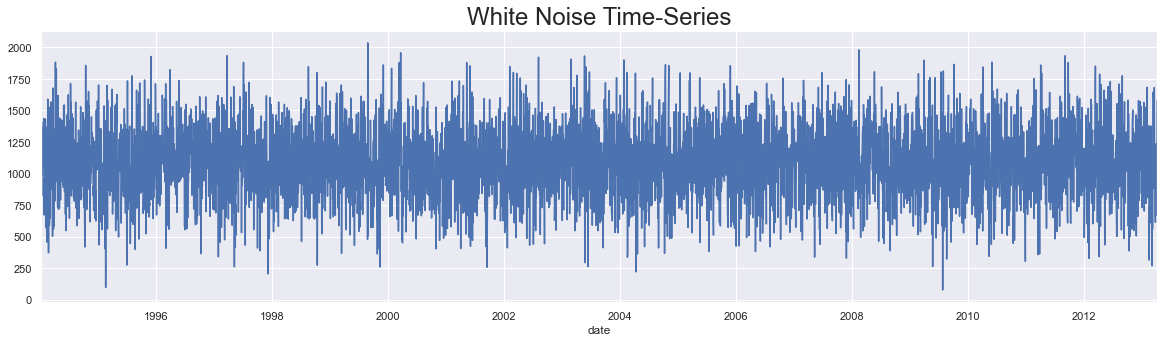

In [58]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

**Notes:** 
* No clear pattern in the data. 
* Most values form around the mean. 
* Large jumps between periods.

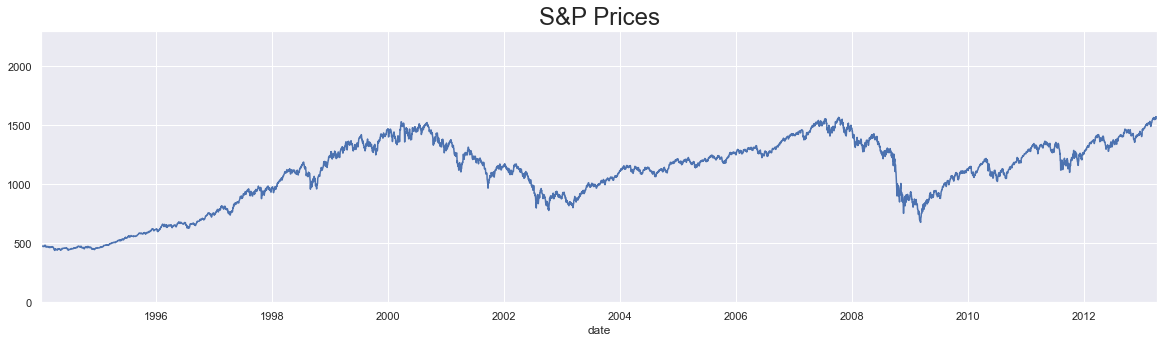

In [59]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)  # getting a figure which has same y axis as the previous one
plt.show()

**Notes:**
* Has pattern. 
* Smaller jumps between periods.

### Random Walk

**A special  type of time-series, where values tend to persist (continue) over time and the differences between periods are simply white noise.**

In [60]:
rw = pd.read_csv("dataset/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [61]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [62]:
df['rw'] = rw.price  # adding the random walk values to the dataset

<ipython-input-62-76ecd00328df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price  # adding the random walk values to the dataset


In [63]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1067.826542,1122.139662
1994-01-10,475.27,1203.566746,1080.347860
1994-01-11,474.13,821.501871,1082.095245
1994-01-12,474.17,1363.225411,1083.639265
1994-01-13,472.47,1283.954814,1067.146255


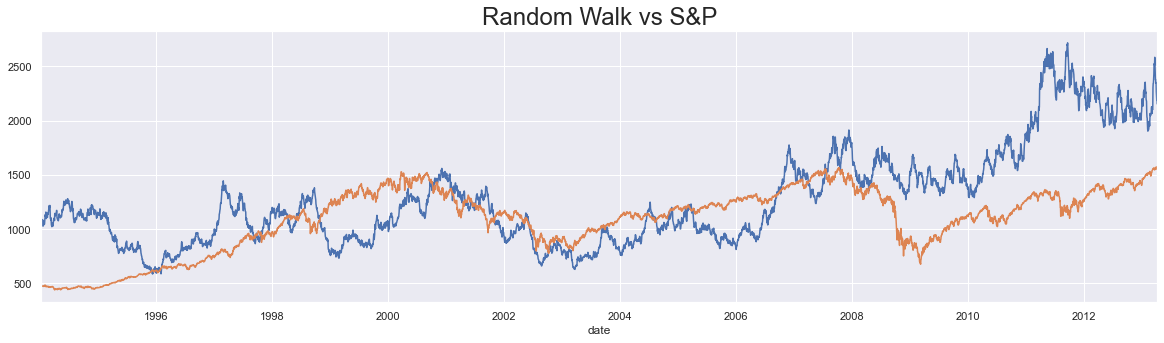

In [64]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

**Notes:** 
* Both have small variations between consecutive time periods.
* Both have cyclical increases and decreases in short periods of time.

### Stationarity

**Stationarity**-Taking consecutive samples of data with the **same size** should have identical covariances regardless of the starting point.

In [52]:
sts.adfuller(df.market_value) #checking stationarity of S&P data

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

Here, Non-stationarity is Null Hypothesis.<br>
**Notes**
1. test statistics> all critical values. So, Fail to reject Null Hypothesis. It means that we can't confirm that the data is stationary.(So, it's Non-stationary)
2. P-value=0.412...  So, there's 40% chance of not rejecting the Null Hypothesis. So, we can't confirm that the data is stationary.

In [53]:
sts.adfuller(df.wn) #checking stationarity for white noise

(-70.98644797048615,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70687.9561181162)

**Notes**
1. test statistics<all critical values. So, reject Null Hypothesis. It means that the data is stationary.
2. P-value=0  So, there's no chance of not rejecting the Null Hypothesis. So, the data is stationary.

In [54]:
sts.adfuller(df.rw) #checking stationarity for random walk

(-1.3286073927689717,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonality

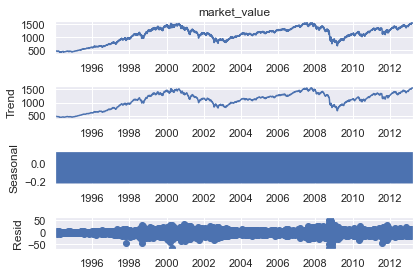

In [65]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

**NOTES:**
* Trend closely resembles the observed series. Because , the decomposition function uses the previous period values as a trend setter. (Current period prices are the best predictor for next periods prices. If we have seasonal pattern we'll have other prices as better predictor).
* The seasonal plot looks like a rectangle. It happens when the values are oscillating back and forth and the figure size is too small. So, here we can't find any concrete cyclical pattern.
* The residuals shows error. Here, the residuals vary greatly around the turn of century(2000) and around 2008. This can be explained by the instability caused by dot com and housing price bubbles respectively.
* **Overall, the results of additive decomposition suggests no seasonality in the data**.

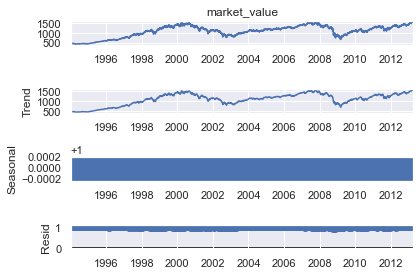

In [66]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF - Auto Correlation Function

In [67]:
sgt.plot_acf?

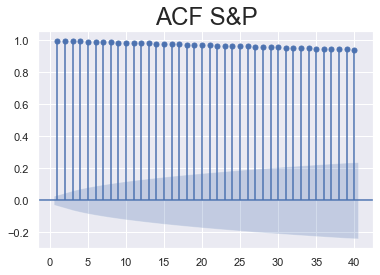

In [68]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)   #by default lags=length of dataframe
plt.title("ACF S&P", size = 24)
plt.show()

**NOTES:**
* values of x axis represent lags. values of y axis represents possible values for autocorrelation coefficient (-1,1)
* The thin lines represent the autocorrelation between time series and a lagged copy of itself. The first line indicates autocorrelation one time period (t-1) ago. The second line represents the coefficient value for two periods (t-2) ago. And so on.
* The blue shaded area around x axis represents significance.
* The values (dots) situated outside this area , suggests the existance of autocorrelation for that specific lag.
* The significance area expands as the lag values increase. The greater the distance in time , the more unlikely it is that this autocorrelation persists. Ex. Today's prices are usually closer to yesterday's price than the price a month ago.
* All the lines (dots) are higher than the blue region . This suggests the **coefficients are significant** which is an indicator of time dependence in the data.
* We can see that auto correlation barely diminishes as the lags increase. This in turn suggests that prices even a month back can still serve as decent estimators.

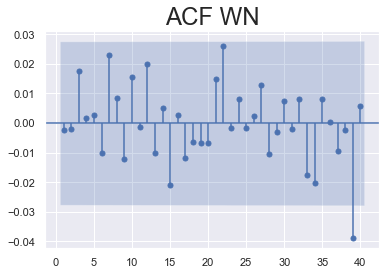

In [59]:
sgt.plot_acf(df.wn, lags = 40, zero = False)   #by default lags=length of dataframe
plt.title("ACF WN", size = 24)
plt.show()

**NOTES**
* The y values are going both ways.So, there are patterns of positive and negative autocorrelation.
* All the line fall in the blue area. Thus the coefficients are not significant across the entire plot. This suggests there is no autocorrelation for any lag which is one of the assumptions of white noise.

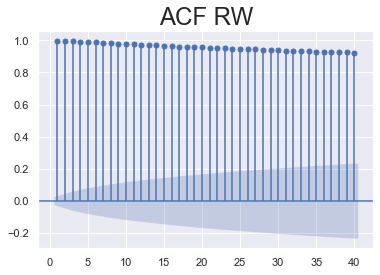

In [70]:
sgt.plot_acf(df.rw, lags = 40, zero = False)   #by default lags=length of dataframe
plt.title("ACF RW", size = 24)
plt.show()

### PACF

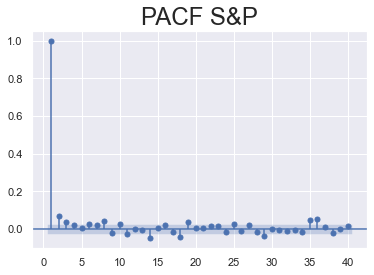

In [71]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

**NOTES**
* Only the first several elements are significantly different from zero.
* Most values after the 3rd lag are within the blue area. This means they aren't significantly different from zero. So, numeric values attached to them are not important.

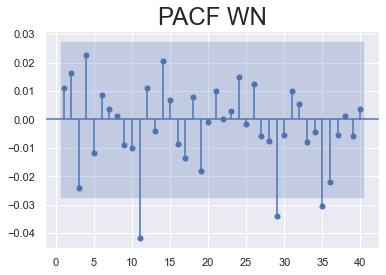

In [72]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

**NOTES**
* Most of the values aren't significantly different from zero.
* Some of the coefficients can end up outside the blue area but they are completely random.

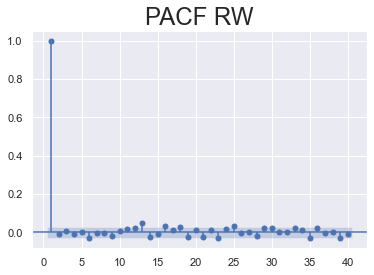

In [73]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()